<a href="https://colab.research.google.com/github/Vractos/data-science/blob/master/Aula1_MeuNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Importando os datasets e modificando os nomes das colunas


In [0]:
import pandas as pd

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId", "titulo", "genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [0]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

#Trabalhando com os dados


Calculando a média das notas de cada filme (filmeId)

In [0]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Unindo as tableas "notas_medias_por_filme" com a tablela "filmes" em uma nova tabela de nome "filmes_com_media" através do filmeId

In [0]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Reordenando e exibindo os dados


Ordenando os dados de acordo com as notas de forma descendente

In [0]:
filmes_com_media.sort_values("nota", ascending=False)

,filmeId,titulo,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


Plotando as notas do filme 1


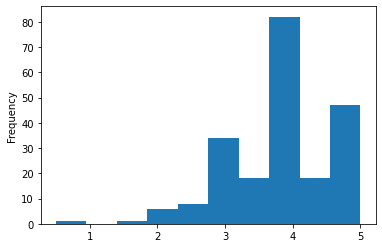

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Plotando as notas do filme 2


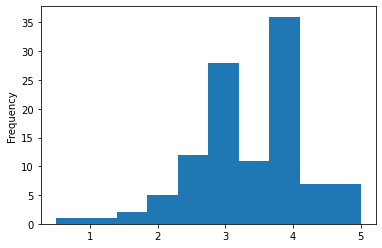

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

Plotando as notas do filme 102084

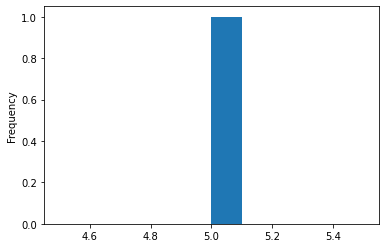

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist')

#Resolução dos desafios

#Desafio 1
Filmes sem nota ordenados por filmeId em ordem cescente

In [0]:
filmes_sem_nota = filmes_com_media.query("nota == 'NaN'").sort_values("filmeId")
filmes_sem_nota

,filmeId,titulo,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


#Desafio 2
Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join


In [0]:
filmes_com_media.columns = ["filmeId",	"titulo",	"genero",	"nota_media"]
filmes_com_media.head()

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


#Desafio 3
Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
avaliacoes_total_por_filme = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_avaliacoes = filmes_com_media.join(avaliacoes_total_por_filme, on="filmeId").sort_values("filmeId")
filmes_com_avaliacoes.columns = ["filmeId","titulo","generos","nota_media","total_votos"]
filmes_com_avaliacoes.head()

,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


#Desafio 4
Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
nota_arredondada = filmes_com_avaliacoes.nota_media.round(2)
filmes_com_nota_arredondada = filmes_com_media.join(nota_arredondada)
filmes_com_nota_arredondada.columns = ["filmeId","titulo","genero","nota_media","nota_arredondada"]
filmes_com_nota_arredondada.head(10)

,filmeId,titulo,genero,nota_media,nota_arredondada
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.07
5,6,Heat (1995),Action|Crime|Thriller,3.946078,3.95
6,7,Sabrina (1995),Comedy|Romance,3.185185,3.19
7,8,Tom and Huck (1995),Adventure|Children,2.875000,2.88
8,9,Sudden Death (1995),Action,3.125000,3.12
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,3.50


#Desafio 5
Descobrir os generos dos filmes (quais são eles, únicos)


In [0]:
generos = filmes['genero'].str.split('|', expand = True)
tb_generos = generos.stack().unique()
tb_generos

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

#Desafio 6
Contar o número de aparições de cada genero.

In [0]:
numero_generos = generos.stack().value_counts()
numero_generos

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

#Desafio 7
Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

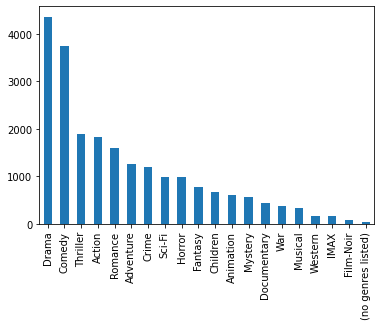

In [0]:
numero_generos.plot(kind='bar')